In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [4]:
import math
bedrooms_median = df.bedrooms.median()
bedrooms_median = math.floor(bedrooms_median)
bedrooms_median

3

In [5]:
df.bedrooms = df.bedrooms.fillna(bedrooms_median)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [8]:
reg = linear_model.LinearRegression()
reg.fit(df[["area","bedrooms","age"]],df.price)

LinearRegression()

In [9]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [10]:
reg.intercept_

383724.99999999994

In [11]:
reg.predict([[3000,3,40]])

c:\users\nitin singh\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

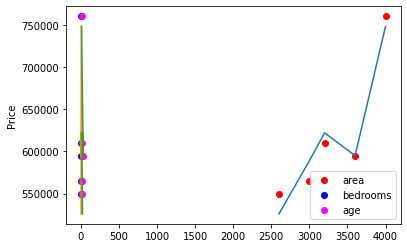

In [18]:
plt.scatter(df.area,df.price,c='red',label="area")
plt.scatter(df.bedrooms,df.price,c='blue',label="bedrooms")
plt.scatter(df.age,df.price,c='magenta',label="age")
plt.plot(df[['area','bedrooms','age']],reg.predict(df[['area','bedrooms','age']]))
plt.ylabel("Price")
plt.legend()
plt.show()

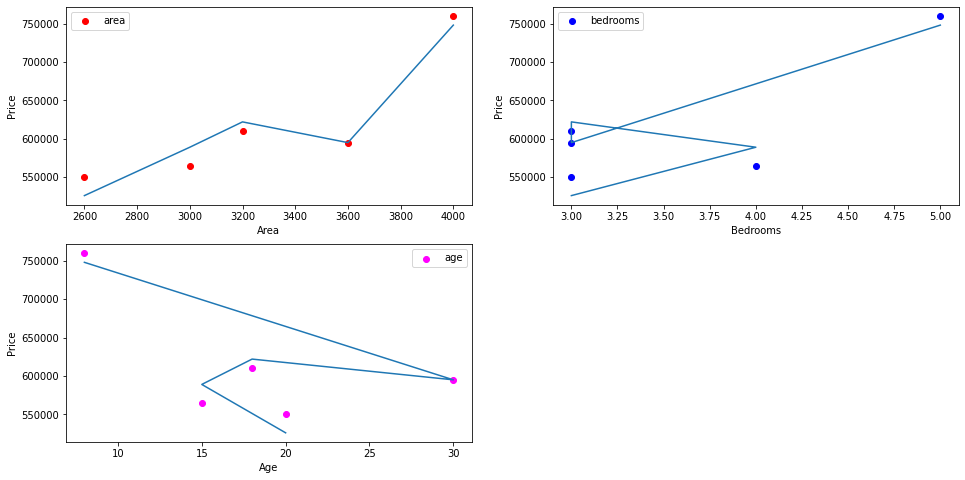

In [30]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
plt.scatter(df.area,df.price,c='red',label="area")
plt.plot(df.area,reg.predict(df[['area','bedrooms','age']]))
plt.ylabel("Price")
plt.xlabel("Area")
plt.legend()

plt.subplot(2,2,2)
plt.scatter(df.bedrooms,df.price,c='blue',label="bedrooms")
plt.plot(df.bedrooms,reg.predict(df[['area','bedrooms','age']]))
plt.ylabel("Price")
plt.xlabel("Bedrooms")
plt.legend()

plt.subplot(2,2,3)
plt.scatter(df.age,df.price,c='magenta',label="age")
plt.plot(df.age,reg.predict(df[['area','bedrooms','age']]))
plt.ylabel("Price")
plt.xlabel("Age")
plt.legend()

plt.show()